# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1375 Зеньков Артем. Вариант №11

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**Регрессионная модель:** 

$$\mathbb{E}(Y|z)=f_{\theta}(z)$$

**Метод наименьших квадратов:** 
$$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$$

**Нормальные уравнения:** $$XX^\intercal\beta=XY$$

**Решение системы нормальных уравнений в регулярном случае:** $$\hat{\beta}=(XX^\intercal)^{-1}XY$$


**Оценка параметра $\sigma^2$** $$s^2 \frac{RSS(\widehat\beta)}{n-r}=\frac{SSe}{n-r}$$

**Доверительный эллипс для параметра $(\beta_0, \beta_1)$:**

**ДНО-функция:** $$\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$$

**МНК оценка** $$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$$

**Доверительный эллипс:** $$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$$

$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

**F - статистика:**  $$\mathbb{F} = \frac{{SS_H}}{S^2*rank(X)} $$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной $Y$ от переменной $X$. Полученные результаты содержательно проинтерпретировать.

In [78]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 

In [79]:
x = np.array([2, 3, 2, 4, 0, 1, 0, 4, 1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 1, 3, 3, 1, 3, 2,
      2, 2, 0, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 1, 1, 2, 1])
y = np.array([10.64, 13.68, 15.12, 11.22, 11.05, 8.75, 10.35, 15.56, 15.03, 14.37, 13.44, 13.70, 14.41, 9.42,
    16.04, 13.52, 16.02, 14.11, 13.59, 17.60, 10.78, 14.63, 10.90, 15.14, 15.30, 13.48, 16.30, 13.96,
    10.67, 12.14, 14.33, 16.90, 15.83, 14.36, 14.46, 11.83, 12.03, 13.22, 16.18, 13.37, 13.99, 15.69, 16.60, 14.72, 13.97, 17.42, 11.27, 11.38, 17.76, 13.67])  

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

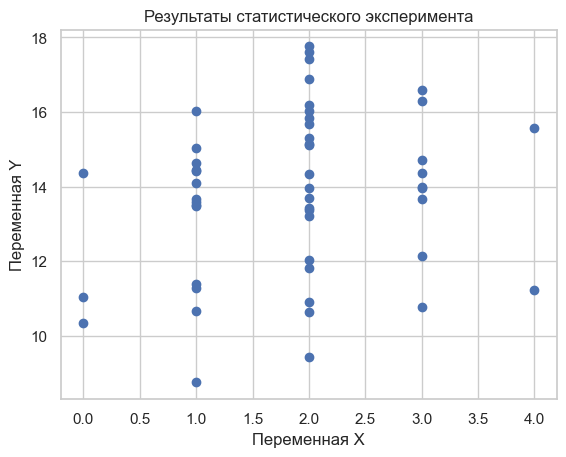

In [80]:
plt.scatter(x, y)
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Результаты статистического эксперимента')
plt.show()

Линейную регрессионную модель переменной Y по переменной X можно сформулировать в следующем виде:

$Y=X^T\beta+\varepsilon=\beta_0+\beta_1x+\varepsilon$

In [106]:
# Создание матрицы X в виде [[1, 1, ..., 1], [x1, x2, ..., x50]]
X_matrix = np.vstack([np.ones_like(x), x])

# Транспонирование матрицы X
transposed_X_matrix = X_matrix.T

# Вычисление произведения X на транспонированную X
result_matrix = np.dot(X_matrix, transposed_X_matrix)

# Нахождение определителя для проверки наличия обратной матрицы
determinant_value = np.linalg.det(result_matrix)
print('Определитель X*X^T:', determinant_value)

# Преобразование вектора y к форме (50, 1)
Y_vector = y.reshape(50, 1)

# Вычисление коэффициентов beta по формуле: (X*X^T)^(-1)*X*Y
beta_coefficients = np.dot(np.dot(np.linalg.inv(result_matrix), X_matrix), Y_vector)
beta_0 = beta_coefficients[0]
beta_1 = beta_coefficients[1]

print('beta_0:', beta_0)
print('beta_1:', beta_1)

Определитель X*X^T: 2101.0000000000023
beta_0: [12.90491671]
beta_1: [0.48015231]


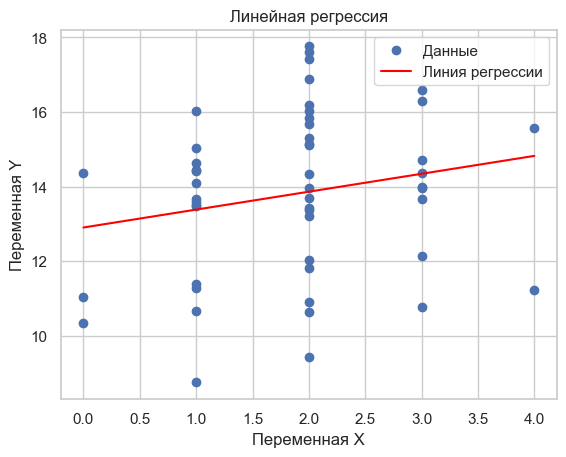

In [107]:
# Создание массива значений x для построения линии регрессии
x_values_for_regression = np.linspace(min(x), max(x), 100)

# Вычисление значений y с использованием коэффициентов beta_0 и beta_1
y_values_for_regression = beta_0 + beta_1 * x_values_for_regression

# Визуализация данных и линии регрессии
plt.scatter(x, y, label='Данные')
plt.plot(x_values_for_regression, y_values_for_regression, color='red', label='Линия регрессии')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

Модель плохо описывает зависимость данных.

#### Задание 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h = 1.30. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ = 0.20 по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Найдем несмещенную оценку дисперсии по формуле: $ s^2=\frac{RSS(β)}{n-r} $

,где $RSS(β)=\sum_{i=1}^{50}\left( Y_i -\beta_0-\beta_1X_i\right)^2$ 

In [108]:
mistakes = y - beta_0 - beta_1 * x
RSS = np.sum(mistakes**2)

# Определение ранга матрицы X
rank_X = np.linalg.matrix_rank(X)

# Вычисление дисперсии ошибок (s)
n = len(x)
degrees_of_freedom = n - rank_X
s = RSS / degrees_of_freedom

print('Дисперсия ошибок (s):', s)

Дисперсия ошибок (s): 4.696963479692211


[-4.63506901 -3.33506901 -2.03506901 -0.73506901  0.56493099  1.86493099
  3.16493099  4.46493099]


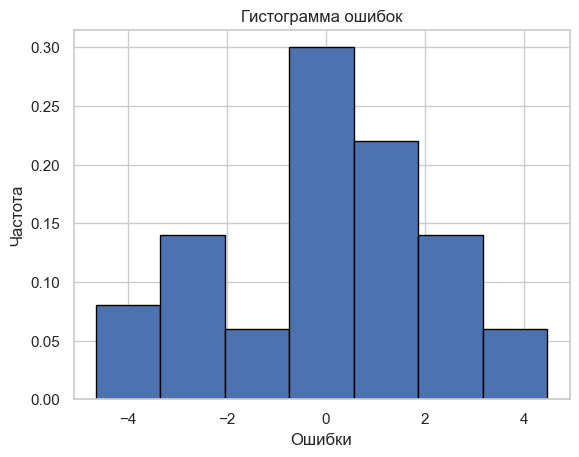

In [112]:
bin_width = 1.30
bins = np.arange(np.min(mistakes), np.max(mistakes) + bin_width, bin_width)
print(bins)
# Вычисление весов для нормализации гистограммы
weights = np.full_like(mistakes, 1/len(mistakes))

# Построение гистограммы ошибок
plt.hist(mistakes, bins=bins, edgecolor='black', weights=weights)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок')
plt.show()


In [138]:
# Вычисление статистики Колмогорова и p-значения
k_statistic, p_value = kstest(mistakes, 'norm')

# Вычисление критического значения x_alpha
alpha = 0.20
x_alpha = ss.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes))

print('Статистика Колмогорова:', k_statistic)
print('x_alpha:', x_alpha)

Статистика Колмогорова: 0.24676354852519003
x_alpha: 0.1517096432224198


$\widehat{D_n} > x_{\alpha}$ значит гипотеза отвергается

[-4.63506901 -3.33506901 -2.03506901 -0.73506901  0.56493099  1.86493099
  3.16493099  4.46493099]


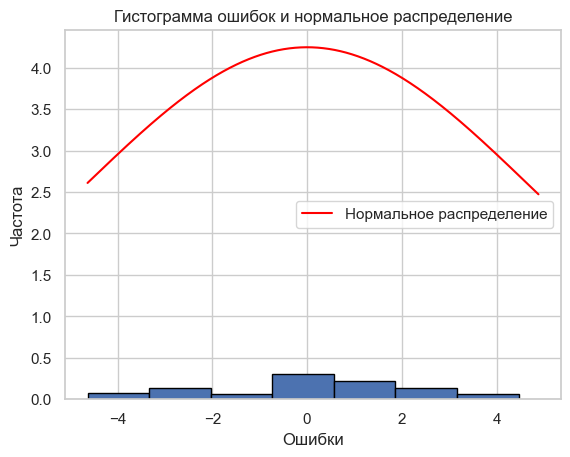

In [122]:
bin_width = 1.30
bins = np.arange(np.min(mistakes), np.max(mistakes) + bin_width, bin_width)
print(bins)
# Вычисление весов для нормализации гистограммы
weights = np.full_like(mistakes, 1/len(mistakes))

# Построение гистограммы ошибок
plt.hist(mistakes, bins=bins, edgecolor='black', weights=weights)

# Построение линии нормального распределения
x_range = np.arange(min(mistakes), max(mistakes) + 1, 0.01)
plt.plot(x_range, norm.pdf(x_range, 0, s) * len(mistakes), color='red', label='Нормальное распределение')

plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок и нормальное распределение')
plt.legend()
plt.show()

Видно, что выдвинутая гипотеза не соответствует действительности

#### Задание 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $(\beta_0,\beta_1)$ (вычислить его полуоси).

При предположении нормальности ошибок, построим доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$.

Формула для доверительного интервала параметров регрессии:

Для $\beta_0$:
$$
CI_{\beta_0} = \hat{\beta_0} \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta_0})
$$

Для $\beta_1$:
$$
CI_{\beta_1} = \hat{\beta_1} \pm t_{\alpha/2, n-2} \cdot SE(\hat{\beta_1})
$$

Доверительный эллипс для $(\beta_0, \beta_1)$ с уровнем доверия $1-\alpha$ строится на основе ковариационной матрицы оценок коэффициентов.

Ковариационная матрица:
$$
Cov(\hat{\beta_0}, \hat{\beta_1}) = \frac{\hat{\sigma}^2}{S_{XX}}
\begin{bmatrix}
\frac{\sum X_i^2}{n} & -\bar{X}\sum X_i \\
-\bar{X}\sum X_i & \sum X_i^2
\end{bmatrix}
$$

Полуоси доверительного эллипса можно вычислить как корни из собственных значений ковариационной матрицы, умноженные на соответствующее квантильное значение хи-квадрат распределения для двух измерений:

$$
\text{semi\_axes} = \sqrt{\chi^2_{1-\alpha} \cdot \text{eigenvalues}}
$$

In [128]:
from scipy.stats import t, chi2

# Расчет коэффициентов регрессии
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
beta_0 = intercept
beta_1 = slope

# Размер выборки
n = len(x)

# Стандартные ошибки оценок коэффициентов
SE_beta_0 = np.sqrt(unbiased_variance * ((1 / n) + (np.mean(x) ** 2) / np.sum((np.array(x) - np.mean(x)) ** 2)))
SE_beta_1 = np.sqrt(unbiased_variance / np.sum((np.array(x) - np.mean(x)) ** 2))

# Критическое значение t-распределения
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df=n - 2)

# Доверительные интервалы для beta_0 и beta_1
CI_beta_0 = (beta_0 - t_critical * SE_beta_0, beta_0 + t_critical * SE_beta_0)
CI_beta_1 = (beta_1 - t_critical * SE_beta_1, beta_1 + t_critical * SE_beta_1)

print(f"Доверительный интервал для beta_0: {CI_beta_0}")
print(f"Доверительный интервал для beta_1: {CI_beta_1}")

# Вычисление матрицы ковариации
covariance_matrix = unbiased_variance / np.sum((np.array(x) - np.mean(x)) ** 2) * np.array([[np.sum(np.array(x) ** 2) / n, -np.mean(x) * np.sum(np.array(x))],
                                                                                             [-np.mean(x) * np.sum(np.array(x)), np.sum(np.array(x) ** 2)]])
# Расчет собственных значений и векторов
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Вычисление полуосей доверительного эллипса
semi_axes = np.sqrt(np.abs(chi2.ppf(1 - alpha, df=2) * eigenvalues))

print(f"Полуоси доверительного эллипса: {semi_axes}")


Доверительный интервал для beta_0: (11.525261515128873, 14.28457189753176)
Доверительный интервал для beta_1: (-0.1851765046024833, 1.145481121451604)
Полуоси доверительного эллипса: [ 7.80627835 14.31120275]


#### Задание 4. Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Выясним коэффициент корреляции Пирсона между переменными X и Y.

Коэффициент корреляции Пирсона определяется следующим образом:

$$ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $$

Проведём проверку значимости коэффициента корреляции для оценки статистической значимости.

In [129]:
from scipy.stats import pearsonr

# Расчет коэффициента корреляции Пирсона и p-value
correlation_coefficient, p_value = pearsonr(x, y)

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"p-value: {p_value}")

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Отклоняем нулевую гипотезу в пользу альтернативной: существует зависимость между переменными X и Y.")
else:
    print("Нет достаточных доказательств для отклонения нулевой гипотезы: переменные X и Y, вероятно, независимы.")


Коэффициент корреляции Пирсона: 0.2029748018022349
p-value: 0.15744661018117354
Нет достаточных доказательств для отклонения нулевой гипотезы: переменные X и Y, вероятно, независимы.


#### Задание 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Регрессионную модель переменной Y по переменной X можно сформулировать в следующем виде:

$Y=X^T\beta+\varepsilon=\beta_0+\beta_1x+\beta_2x^2+\varepsilon$

In [130]:
# Создание матрицы X2 в виде [[1, 1, ..., 1][x1, x2, ..., x50][x1^2, x2^2, ..., x50^2]]
X2_matrix = np.vstack([np.ones_like(x), x, x**2])

# Транспонирование матрицы X2
transposed_X2_matrix = X2_matrix.T

# Вычисление произведения X2 на транспонированную X2
result_matrix = np.dot(X2_matrix, transposed_X2_matrix)

# Нахождение определителя, чтобы убедиться, что у матрицы есть обратная
determinant_value = np.linalg.det(result_matrix)
print('Определитель X*X^T:', determinant_value)

# Преобразование вектора y к форме (50, 1)
Y2_vector = y.reshape(50, 1)

# Вычисление коэффициентов beta по формуле: (X*X^T)^(-1)*X*Y
beta_coefficients = np.dot(np.dot(np.linalg.inv(result_matrix), X2_matrix), Y2_vector)
beta_0 = beta_coefficients[0]
beta_1 = beta_coefficients[1]
beta_2 = beta_coefficients[2]

print('beta_0:', beta_0)
print('beta_1:', beta_1)
print('beta_2:', beta_2)


Определитель X*X^T: 136272.00000000003
beta_0: [11.67087707]
beta_1: [2.1513341]
beta_2: [-0.43589732]


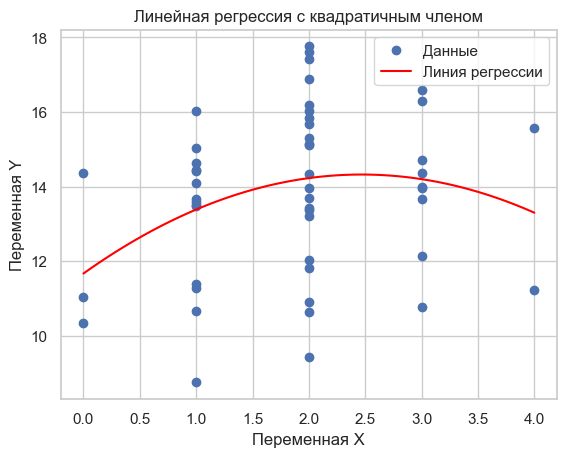

In [131]:
# Вычисление значений Y с использованием коэффициентов beta_0, beta_1 и beta_2
y_values2 = beta_0 + beta_1 * x_values + beta_2 * x_values**2

# Визуализация данных и линии регрессии
plt.scatter(x, y, label='Данные')
plt.plot(x_values, y_values2, color='red', label='Линия регрессии')
plt.xlabel('Переменная X')
plt.ylabel('Переменная Y')
plt.title('Линейная регрессия с квадратичным членом')
plt.legend()
plt.show()


#### Задание 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Найдем несмещенную оценку дисперсии по формуле: $ s^2=\frac{RSS(β)}{n-r} $

,где $RSS(β)=\sum_{i=1}^{50}\left( Y_i -\beta_0-\beta_1X_i-\beta_2(X_i)^2\right)^2$ 

In [132]:
mistakes2 = y - beta_0 - beta_1 * x - beta_2 * (x**2)
RSS2 = np.sum(mistakes2**2)

# Определение ранга матрицы X
r = np.linalg.matrix_rank(X)

# Вычисление дисперсии ошибок (s)
n = len(x)
s = RSS2 / (n - r)

print('Дисперсия ошибок (s):', s)

Дисперсия ошибок (s): 4.440215080867676


[-4.80995597 -3.50995597 -2.20995597 -0.90995597  0.39004403  1.69004403
  2.99004403  4.29004403]


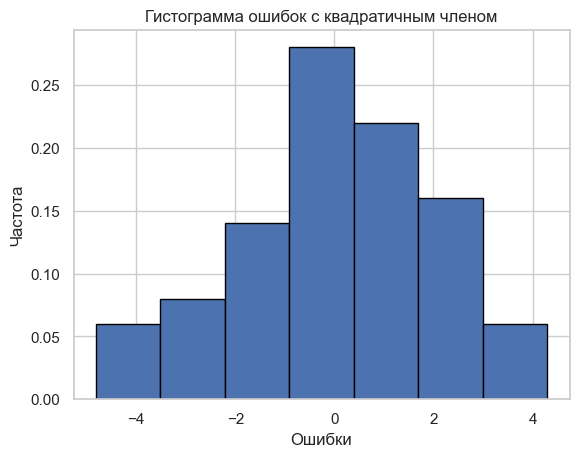

In [133]:
bin_width = 1.30
bins = np.arange(np.min(mistakes2), np.max(mistakes2) + bin_width, bin_width)
print(bins)
# Вычисление весов для нормализации гистограммы
weights = np.full_like(mistakes2, 1/len(mistakes2))

# Построение гистограммы ошибок
plt.hist(mistakes2, bins=bins, edgecolor='black', weights=weights)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок с квадратичным членом')
plt.show()


In [139]:
# Вычисление статистики Колмогорова и p-значения
k_statistic, p_value = kstest(mistakes2, 'norm')

# Вычисление критического значения x_al
alpha = 0.20
x_al = ss.kstwobign.ppf(1 - alpha) / np.sqrt(len(mistakes2))

print('Статистика Колмогорова:', k_statistic)
print('x_al:', x_al)

Статистика Колмогорова: 0.2175886129911568
x_al: 0.1517096432224198


$\widehat{D_n} > x_{\alpha}$ значит гипотеза отвергается

[-4.63506901 -3.33506901 -2.03506901 -0.73506901  0.56493099  1.86493099
  3.16493099  4.46493099]


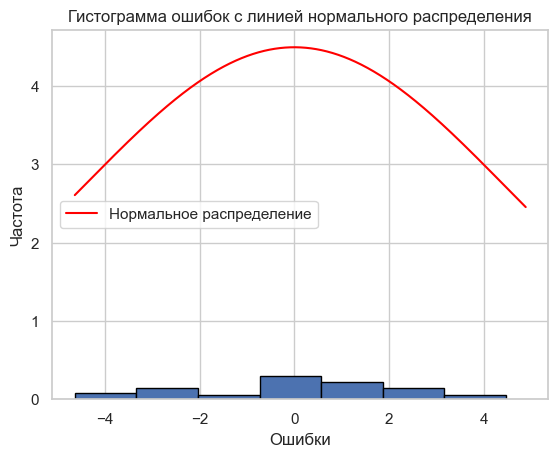

In [135]:
bin_width = 1.30
bins = np.arange(np.min(mistakes), np.max(mistakes) + bin_width, bin_width)
print(bins)
# Вычисление весов для нормализации гистограммы
weights = np.full_like(mistakes, 1/len(mistakes))

# Построение гистограммы ошибок
plt.hist(mistakes, bins=bins, edgecolor='black', weights=weights)

# Построение линии нормального распределения
x_range = np.arange(min(mistakes), max(mistakes) + 1, 0.01)
plt.plot(x_range, norm.pdf(x_range, 0, s) * len(mistakes), color='red', label='Нормальное распределение')

plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок с линией нормального распределения')
plt.legend()
plt.show()


Видно, что выдвинутая гипотеза не соответствует действительности

#### Задание 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

In [104]:
from scipy.stats import norm

# Уровень доверия
alpha = 0.2

# Критическое значение для уровня доверия (alpha/2 для двухстороннего доверительного интервала)
z_alpha = norm.ppf(1 - alpha / 2)

# Ковариационная матрица оценок параметров регрессии
cov_matrix = covariance  # covariance - матрица ковариаций, полученная из МНК

# Доверительные интервалы для beta_0, beta_1, beta_2
confidence_interval_beta_0 = (beta_0 - z_alpha * np.sqrt(cov_matrix[0, 0]), beta_0 + z_alpha * np.sqrt(cov_matrix[0, 0]))
confidence_interval_beta_1 = (beta_1 - z_alpha * np.sqrt(cov_matrix[1, 1]), beta_1 + z_alpha * np.sqrt(cov_matrix[1, 1]))
confidence_interval_beta_2 = (beta_2 - z_alpha * np.sqrt(cov_matrix[2, 2]), beta_2 + z_alpha * np.sqrt(cov_matrix[2, 2]))

print(f"Доверительный интервал для beta_0: {confidence_interval_beta_0[0][0], confidence_interval_beta_0[1][0]}")
print(f"Доверительный интервал для beta_1: {confidence_interval_beta_1[0][0], confidence_interval_beta_1[1][0]}")
print(f"Доверительный интервал для beta_2: {confidence_interval_beta_2[0][0], confidence_interval_beta_2[1][0]}")

# Уравнение доверительного эллипсоида
semi_axes = np.sqrt(np.diag(cov_matrix))
print(f"Уравнение доверительного эллипсоида: x^2/{semi_axes[0]**2} + y^2/{semi_axes[1]**2} = 1")

Доверительный интервал для beta_0: (10.373790323869036, 12.967963814912379)
Доверительный интервал для beta_1: (0.7856733524527755, 3.5169948405728997)
Доверительный интервал для beta_2: (-0.7747567055553075, -0.09703794044681685)
Уравнение доверительного эллипсоида: x^2/1.0243912775848565 + y^2/1.1355688755639537 = 1


#### Задание 8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

### Гипотезы

$H_0$: Отсутствие линейной зависимости: $\beta_1 = 0$

$H_1$: Наличие линейной зависимости: $\beta_1 \neq 0$

### Проверка значимости

Для проверки значимости используем коэффициент наклона $\beta_1$ и его p-value при уровне значимости $\alpha$.

In [137]:
from scipy.stats import linregress

# Выполним линейную регрессию для получения коэффициентов, в том числе коэффициента наклона (beta_1)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

alpha = 0.2

# Выводим результаты линейной регрессии
print(f"Коэффициент наклона (beta_1): {slope}")
print(f"П-значение для beta_1: {p_value}")

# Проверка гипотезы о линейной зависимости
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: существует линейная зависимость между X и Y.")
else:
    print("Нет достаточных доказательств для отклонения нулевой гипотезы: вероятно, отсутствует линейная зависимость между X и Y.")


Коэффициент наклона (beta_1): 0.4801523084245604
П-значение для beta_1: 0.1574466101811729
Отклоняем нулевую гипотезу: существует линейная зависимость между X и Y.


## Выводы

В ходе выполнения практической работы был проведен регрессионный анализ. Построены линейные модели, произведена оценка параметров и исследование их значимости, проверены гипотезы о независимости и линейной регрессионной зависимости, построены оценки нормальности ошибок, доверительные интервалы и доверительный эллипс и эллипсоид. Было оценено расстояние полученных оценок до класса нормальных распределений по Колмогорову. Сформулирована гипотеза о независимости переменной Y от переменной X.